# Linear Regression이란?
- 회귀계수와 선형결합으로 이루어진 모델을 말한다. x, y 간에 선형성이 있다는 것이 아니고, "회귀계수(parameter 혹은 딥러닝에서는 weight)가 input x와 선형적으로 결합한 모델"이다.
- 따라서, 선형회귀모델은 x,y 좌표평면에 직선이 될 수도 있고, 곡선 형태가 될 수도 있다. 직선으로 나타나는 선형회귀모델은 basis가 1 이고 input x일때이다. 직선이 아닌 형태로 나타나는 경우는 basis가 여러개 있다는 것이고, input이 x, x**2, sin(x), ln(x) 등 x를 확장한 basis 모두 가능하다.
- 다양한 모델링 방법이 있는데, 그 중에 어떤 것이 좋을까? 데이터에 완전히 fitting하는 방법이 무조건 좋은 것은 아니다. 즉 loss가 0이 되게하는 모델이 좋은 것은 아니라는 말이다. 왜냐하면 훈련 데이터셋에 오버피팅된 상황이 발생하기 때문이다. CS231n의 lecture 3에서 regularization 에 대해 이야기하는데, 손실함수에는 data loss 부분과 regularization 두 부분이 있다고 설명한다. 이때 손실함수에 data loss만 작게 나오는 것이 좋은 것이 아니고, 오버피팅되지 않게 경향성을 반영하여 간단하게 모델링을 하도록 regularization을 해주는 것이 바로 이 이유이다.

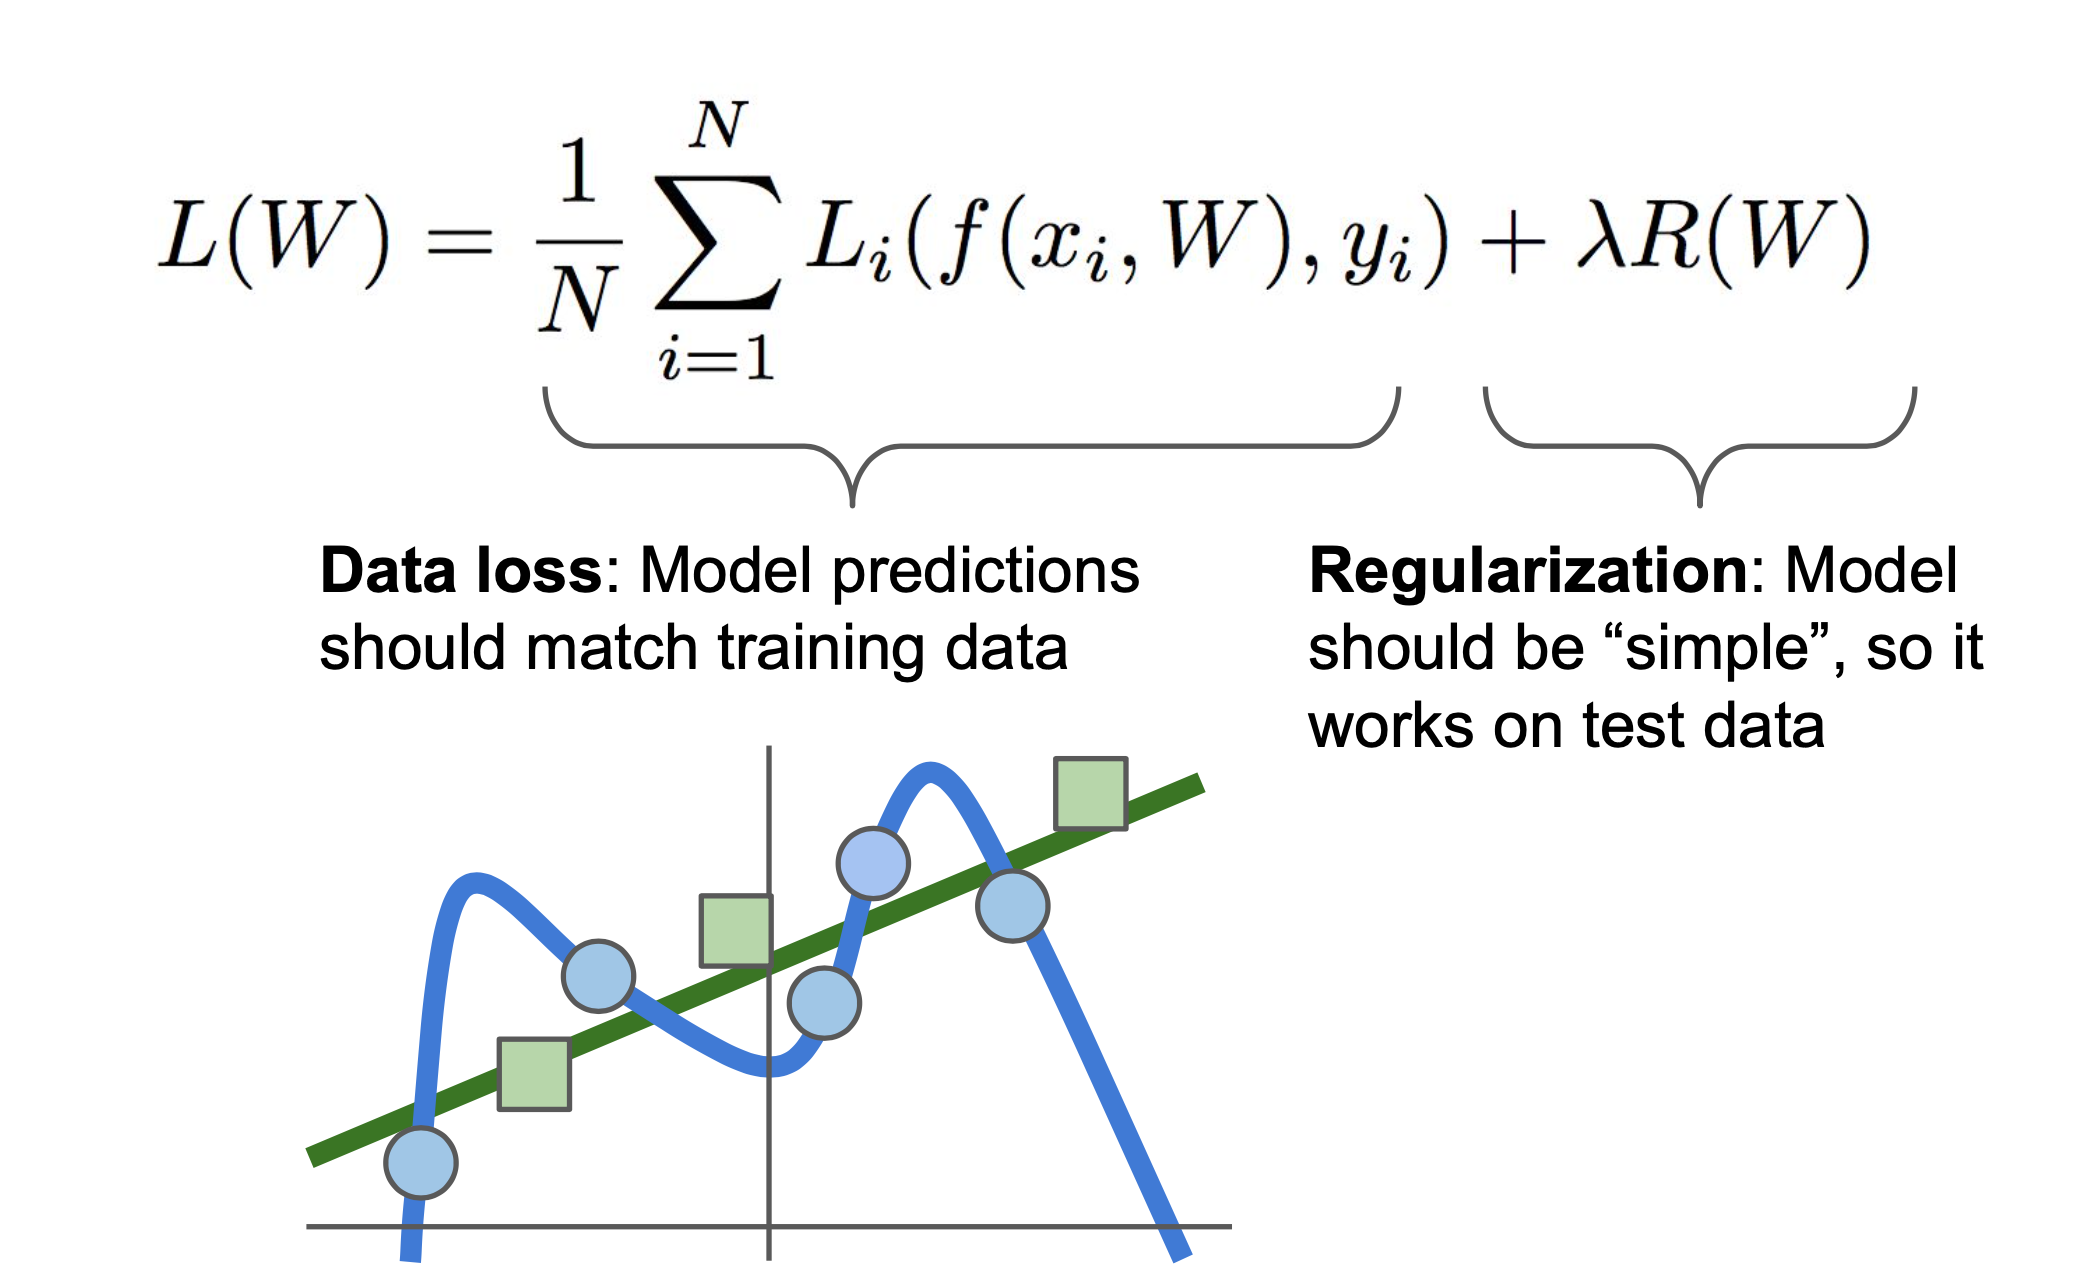

## 간단하게 선형회귀모델 그려보기

In [1]:
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression

lr = LinearRegression()


coefficient w1: -0.20467210799310015


Text(0, 0.5, 'Target')

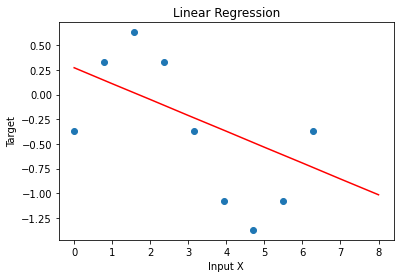

In [2]:
import matplotlib.pyplot as plt

X = np.array([0.0, 0.79, 1.57, 2.36, 3.14, 3.93, 4.71, 5.5, 6.28])          #input vector X
T = np.array([-0.37, 0.33, 0.63, 0.33, -0.37, -1.08, -1.37, -1.08, -0.37])   # target vector T
X_reshaped = X.reshape(-1, 1)
T_reshaped = T.reshape(-1, 1)

lr.fit(X_reshaped,T_reshaped)
T_hat = lr.predict(X_reshaped)  # 선형회귀모델이 예측한 T값
T_hat_smooth = lr.predict(np.linspace(0,7,100).reshape(-1,1))
print("\ncoefficient w1:",lr.coef_[0][0])

# X에 대한 선형회귀모델을 그래프로 표현
fig=plt.figure(figsize=(6,4))

ax = fig.add_subplot(1,1,1)
ax.scatter(X_reshaped, T_reshaped) # 실제 데이터에 대한 산포도
ax.plot(T_hat, color='red') # 선형회귀모델의 추세선
ax.set_title("Linear Regression")
ax.set_xlabel("Input X") # x축
ax.set_ylabel('Target') # y축


[[ 0.      0.    ]
 [ 0.79    0.6241]
 [ 1.57    2.4649]
 [ 2.36    5.5696]
 [ 3.14    9.8596]
 [ 3.93   15.4449]
 [ 4.71   22.1841]
 [ 5.5    30.25  ]
 [ 6.28   39.4384]] (9, 2)

coefficient
w1: -0.20452638675327453 , w2: -2.3193759974073235e-05


Text(0, 0.5, 'Target')

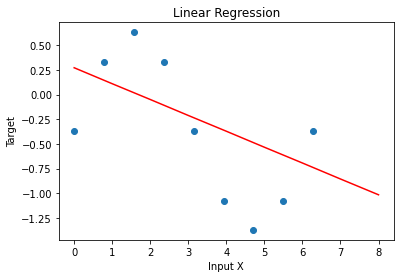

In [3]:
# 다항회귀 (X, X**2) : basis 2개 확장
X_2 = np.append([X], [X**2], axis=0)
X_2_reshaped = X_2.T
print(X_2_reshaped, X_2_reshaped.shape)

lr.fit(X_2_reshaped, T_reshaped)
T_hat_2 = lr.predict(X_2_reshaped)
print("\ncoefficient\nw1:",lr.coef_[0][0], ", w2:",lr.coef_[0][1])

fig=plt.figure(figsize=(6,4))

ax = fig.add_subplot(1,1,1)
ax.scatter(X_reshaped, T_reshaped) # 실제 데이터에 대한 산포도
ax.plot(T_hat_2, color='red') # 선형회귀모델의 추세선
ax.set_title("Linear Regression")
ax.set_xlabel("Input X") # x축
ax.set_ylabel('Target') # y축

[[  0.         0.         0.      ]
 [  0.79       0.6241     0.493039]
 [  1.57       2.4649     3.869893]
 [  2.36       5.5696    13.144256]
 [  3.14       9.8596    30.959144]
 [  3.93      15.4449    60.698457]
 [  4.71      22.1841   104.487111]
 [  5.5       30.25     166.375   ]
 [  6.28      39.4384   247.673152]] (9, 3)

coefficient
w1: 1.6806326892069936 , w2: -0.7960332826553507 , w3: 0.0844982489565751


Text(0, 0.5, 'Target')

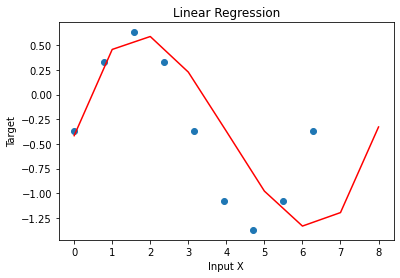

In [4]:
# 다항회귀 (X, X**2, X**3) : basis 3개 확장
X_3 = np.append(X_2, [X**3], axis=0)
X_3_reshaped = X_3.T
print(X_3_reshaped, X_3_reshaped.shape)

lr.fit(X_3_reshaped, T_reshaped)
T_hat_3 = lr.predict(X_3_reshaped)

print("\ncoefficient\nw1:",lr.coef_[0][0], ", w2:",lr.coef_[0][1], ", w3:",lr.coef_[0][2])

fig=plt.figure(figsize=(6,4))

ax = fig.add_subplot(1,1,1)
ax.scatter(X_reshaped, T_reshaped) # 실제 데이터에 대한 산포도
ax.plot(T_hat_3, color='red') # 선형회귀모델의 추세선
ax.set_title("Linear Regression")
ax.set_xlabel("Input X") # x축
ax.set_ylabel('Target') # y축

basis 1 가중치(회귀계수):
 coefficient w1: -0.20467210799310015
basis 2 가중치(회귀계수):
 w1: -0.20452638675327453 , w2: -2.3193759974073235e-05
basis 3 가중치(회귀계수):
 [[ 1.68063269 -0.79603328  0.08449825]]
basis 4 가중치(회귀계수):
 [[ 1.66523634e+00 -7.83497600e-01  8.12860990e-02  2.55808781e-04]]
basis 5 가중치(회귀계수):
 [[ 0.87685953  0.27622915 -0.39729261  0.08769051 -0.00556881]]
basis 6 가중치(회귀계수):
 [[ 8.39448804e-01  3.49668379e-01 -4.47458936e-01  1.03090638e-01
  -7.74671223e-03  1.15478975e-04]]
basis 7 가중치(회귀계수):
 [[ 9.22952344e-01  1.35291060e-01 -2.47902580e-01  1.39690712e-02
   1.28590508e-02 -2.26097865e-03  1.08059631e-04]]
basis 8 가중치(회귀계수):
 [[ 8.17921624e-01  4.57143641e-01 -6.22979077e-01  2.35036437e-01
  -5.95870169e-02  1.11109489e-02 -1.19165929e-03  5.17046296e-05]]
basis 9 가중치(회귀계수):
 [[ 9.11272527e-01  1.34822892e-01 -1.81218120e-01 -8.50445885e-02
   7.62942958e-02 -2.38294311e-02  4.16130684e-03 -3.97551227e-04
   1.58859921e-05]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


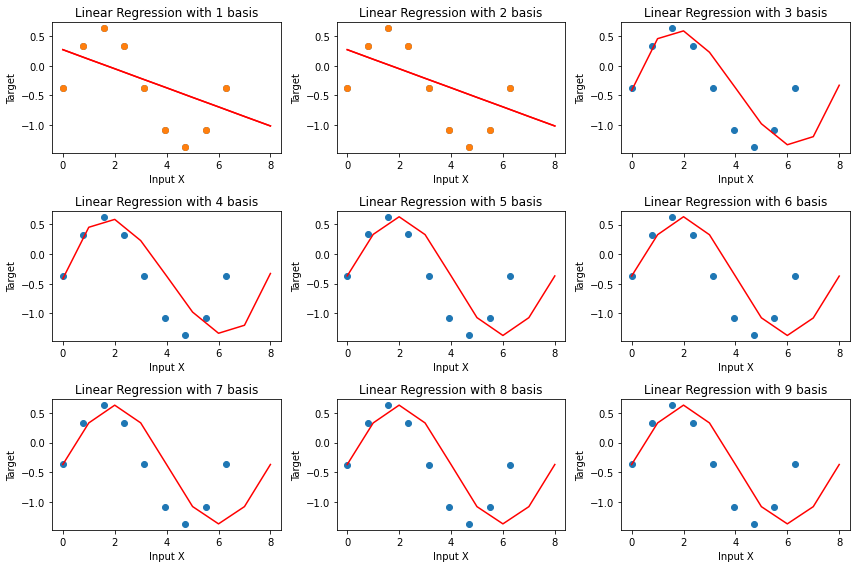

In [5]:
# basis 1 ~ basis 9 까지 선형회귀모델 그려보기
list_T_hat = [T_hat, T_hat_2]

new = X_2
fig=plt.figure(figsize=(12,8))

print("basis 1 가중치(회귀계수):\n","coefficient w1: -0.20467210799310015")
print("basis 2 가중치(회귀계수):\n","w1: -0.20452638675327453 , w2: -2.3193759974073235e-05")

for i in range(1, 10):
  if i in range(1,3):
    ax = fig.add_subplot(3,3,1)
    ax.scatter(X_reshaped, T_reshaped) # 실제 데이터에 대한 산포도
    ax.plot(T_hat, color='red') # 선형회귀모델의 추세선
    ax.set_title("Linear Regression with 1 basis")
    ax.set_xlabel("Input X") # x축
    ax.set_ylabel('Target') # y축

    ax = fig.add_subplot(3,3,2)
    ax.scatter(X_reshaped, T_reshaped) # 실제 데이터에 대한 산포도
    ax.plot(T_hat_2, color='red') # 선형회귀모델의 추세선
    ax.set_title("Linear Regression with 2 basis")
    ax.set_xlabel("Input X") # x축
    ax.set_ylabel('Target') # y축
  
  else:  
    new = np.append(new, [X**i], axis=0)    # 거듭제곱하면서 basis 확장
    new_reshaped=new.T

    lr.fit(new_reshaped, T_reshaped)
    new_T_hat=lr.predict(new_reshaped)
    list_T_hat.append(new_T_hat)
    print("basis {} 가중치(회귀계수):\n".format(i), lr.coef_)

    ax = fig.add_subplot(3,3,i)
    ax.scatter(X_reshaped, T_reshaped) # 실제 데이터에 대한 산포도
    ax.plot(new_T_hat, color='red') # 선형회귀모델의 추세선
    ax.set_title("Linear Regression with {} basis".format(i))
    ax.set_xlabel("Input X") # x축
    ax.set_ylabel('Target') # y축

fig.tight_layout()
plt.show()

- 위는 predict한 점들을 연결한 그래프. 더 많은 점들을 predict해서 연결해주면 부드러운 곡선형태로 나타날 수 있을 것 같다.